# Problem Set 04: 

0. [Credit for Contributors (required)](#contributors)

1. [Activity Planning](#problem1)
    1. [Defining Predicates (5 points)](#predicates)
    2. [Problem Formulation (5 points)](#problem_form)
    3. [Relaxed Plan Graph and FF Heuristic (20 points)](#relaxed)
      
2. [RRT Path Planning (70 points)](#problem2)

    
**100 points** total for Problem Set 4



## <a name="contributors"></a> Credit for Contributors

List the various students, lecture notes, or online resouces that helped you complete this problem set:

Ex: I worked with Bob on the cat activity planning problem.

<div class="alert alert-info">
Write your answer in the cell below this one.
</div>

TA during office hours. Lecture note 5 and 6 from Stellar, 16.413. Source code from Assignment 3, 16.413: search_classes.py, graph.py

## <a name="problem1"></a> Problem 1: Activity Planning (30%)

In this problem, we will model planning an observation for a spacecraft in orbit around Mars. Many older spacecraft were not designed with concurrency in mind, and so they required attitude (orientation) changes to point different instruments towards the Martian surface, the Earth, or the Sun. 



<img src=maven.png style="width: 60%;">


In our model, the orbiter has a sensor, a communications radar, solar cells for charging a battery, and a data cache. 

At any point in time, the orbiter may be:

- pointed at Mars (sensor pointed to surface for observations)
- pointed at Earth (radar pointed to Earth for transmission)
- pointed at the Sun (solar panels to Sun for charging)

These options are assumed to be mutually exclusive. We model attitude changes as requiring no power.

If the orbiter is pointed at the Sun, it may charge its battery to full. If the orbiter is pointed at Mars and has a full battery, it may make an observation. The observation empties the orbiter’s battery, but it gains data as a result. If the orbiter is pointed at Earth, has a full battery, and data in its cache, it may transmit data. Transmission of the data home empties the orbiter’s battery and the data cache. The objective of the mission is for the data to be sent back to Earth.

We will model the orbiter’s available actions as the following:
- Point at Earth
- Point at Mars
- Point at Sun
- Charge
- Observe
- Transmit 

### <a name="predicates"></a>Defining Predicates

Define the predicates for the problem, and define the preconditions and effects for each of the actions above. An example is given below. You may use the predicates in the example, but you are not obligated to.

**Observe:**

&nbsp;&nbsp;&nbsp;*Preconditions:* pointed-at-mars, battery-full

&nbsp;&nbsp;&nbsp;*Effects:* data-onboard, not battery-full 


Predicates represent statements that are always true or false, so something like (pointed == Mars), which is more like a variable that could have the values {Mars, Earth, Sun}, is invalid. 


1. Define your predicates to model the problem.

2. Write the preconditions and effects for each of the 6 actions.

3. Do your actions (preconditions and effects) prevent you from pointing at two places at the same time? You may assume the start state is only pointed at a single location.

4. The mission ends when the data has been transmitted. Can your predicates be used to indicate that the goal has been achieved?

You may upload handwritten work for any of the following answers, with the same instructions from Problem Set 3. You can use the html tag provided in the cell below by changing the name of the image file.


<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

![title](Pset4_p1.jpg)

### <a name="problem_form"></a>Problem Formulation

Assume the orbiter starts pointed at Mars, with batteries empty and with no sensor data onboard. Write this initial state and the final state in terms of your predicates. Recall that an omitted predicate in the initial state implies that the predicate is false.


1. Write the intial and goal states (in terms of your predicates that are True).

2. Write a sequence of actions from start to goal. 

3. What does this sequence tell you about the search tree depth that would need to be searched by Breadth First Search?



<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

![title](Pset4_p2.jpg)

### <a name="relaxed"></a>Relaxed Plan Graph and FF Heuristic

Now build a relaxed plan graph for the scenario to calculate the Fast-Forward heursitic value of the initial state.
You should organize the relaxed plan graph into columns of 'Facts n' (states/predicates that are True at time n) and 'Actions n' (actions that can be taken as time n given Facts n), as shown below. There is an example worked out in Lecture 05 slides. 


<img src="relaxed_graph.png"/>


1. Create the relaxed plan graph that starts with the initial state and achieves all of the goal predicates.

2. What is the associated FF heuristic for the intial state?

3. How does the heuristic compare to the length of the true plan you found in the second part? If they are different, why?



<div class="alert alert-info">
Write or upload your answer in the cell below this one.
</div>

![title](Pset4_p3.jpg)



## <a name="problem2"></a> Problem 2 : RRT Path Planning (70%)

In this problem you will implement the Rapidly-Exploring Random Tree (RRT) algorithm to help a robot navigate from its starting position to the desired end region in an environment full of obstacles.

<img src='rrt_examples.png'/>

You will implement the function `rrt` with the following signature:

```python
def rrt(bounds, environment, start_pose, radius, end_region)
```

where:

- `bounds=(minx, miny, maxx, maxy)` is a tuple that indicates the bounds of the environment (the region the robot can traverse). Example `bounds=(-5, -4, 15, 5)`.
- `environment` is an instance of the `Environment` class that describes the placement of the obstacles in the scene (see more examples below).
- `start_pose = (x,y)` is a tuple indicating the starting position of the robot. Example: `start_pose=(-4, -2)`.
- `radius` is the radius of the robot (used for collision checking). Example `radius=0.1`.
- `end_region` is a `shapely` `Polygon` that describes the region that the robot needs to reach. See examples below.

Your function should:

- return a list of tuples `(x,y)` describing the obstacle free path that takes the robot to the target region. Example of a valid returned path: `[(-4, -2), (-3.71, -1.97), (-3.41, -1.8865), (-3.50, -2.69)]`. Note that your rrt function should produce paths such that the straight line connecting any pair of consecutive points should be obstacle free (considering the obstacles and the size of the robot). In the given example, it should be possible to go from `(-4, -2)` to `(-3.71, -1.97)` in a straight line without colliding with anything.
- produce a plot showing the tree and the obstacle free path (such as the ones shown above)
- show the number of nodes in the tree, the number of nodes in the solution path and the path length (you could put this in the plot title, as in the examples above)


**You are required to submit this notebook with:**

1. The code function `rrt` as described above
2. The results (plots) of using your `rrt` function in the easy and bugtrap environments provided (see code stubs below).
3. The results of using your `rrt` function in a moderate (40 obstacles) and hard (+300 obstacles) environments that you will generate yourself. You will probably want to generate these environments automatically.

See the provided example notebook [RRT Helpful Examples](ProblemSet04_RRT_examples.ipynb) for examples on how to use the `Environment` class, the `shapely` library, and how to do some simple collision checking.


<div class="alert alert-info">
**NOTE:** You don't need to write all your code in this notebook if you don't want to. You could create your own `.py` files and then import them into this notebook. We do require that we are able to run the two environments that we provide and the two that you generate in this notebook and that the plots are embedded here.
</div>


<div class="alert alert-warning">
Please ensure that you submit your notebook with the cells already executed. That is, you should save the notebook when your code has been executed and the plots are visible. That way, we will be able to look at your solution initially without running your code first.
</div>



In [1]:
# Useful imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
from __future__ import division
from matplotlib import pyplot as plt
import numpy as np
import yaml
from shapely.geometry import Point, Polygon, LineString, box
from environment import Environment, plot_environment, plot_line, plot_poly
from check_path import check_path

ImportError: No module named shapely.geometry

In [2]:
# NB! My own implementations and some of the classes used from earlier assignments are found in support_pset4.py
from support_pset4 import *

def rrt(bounds, environment, start_pose, radius, end_region):
    # bounds: (minx, miny, maxx, maxy) tuple over region
    # environment: instance of the Environment class that describes the placement of the obstacles in the scene
    # start_pose: start_pose = (x,y) is a tuple indicating the starting position of the robot
    # radius: radius is the radius of the robot (used for collision checking)
    # end_region: end_region is a shapely Polygon that describes the region that the robot needs to reach

    # Adding tuples to nodes -> represent all nodes expanded by tree
    nodes = [start_pose]

    # Creating graph of SearchNodes from the tuples to represent the tree with parents. Used to order and
    graph = Graph()
    graph.add_node(SearchNode(start_pose))
    goalPath = Path(SearchNode(start_pose)) # for initialization in case of no path found
    
    # Draw the environment (with its obstacles) and with the start node + end region
    ax = plot_environment(environment,bounds)
    plot_poly(ax, Point(start_pose).buffer(radius, resolution=3),'blue')
    plot_poly(ax, end_region,'red', alpha=0.2)
    
    for i in range(10000):  # random high number
        # this range must be evaluated according to size of problem. RRT do not ensure any solution paths
        
        # sample a random node inside bounds (random number between xmin/max and ymin/max)
        # keep all bound-checking to this stage as we don't want to check more later
        rand_xval = random.uniform(bounds[0],bounds[2])
        rand_yval = random.uniform(bounds[1],bounds[3])
        node_rand = (rand_xval,rand_yval)
        
        # for every x'th iteration - aim towards goal. a good value for this parameter varies
        # I tried to vary between 5 and 20 for the simple environment, and found no pattern due to the random sampling
        # a good choice also depends on the step length that I decided in STEERPATH
        # bu one thing is certain: not having this makes total number of nodes blow up
        # I have kept choices of when to goal bias and the travel distance in steering function to perform well in large environments
        
        if not(i % 15):
            node_rand = end_region.centroid.coords[0]

        # find out which node in our list that is the nearest to the random node
        node_nearest, node_dist = nearestSNode(graph, node_rand) # returning a searchNode and a float distance

        # steer towards the new node -> CORRECT PARENTS SO PATH CAN BE EXTRACTED DIRECTLY AND ADD COST FOR PATH LENGTH
        steered_node = steerPath(node_nearest.state, node_rand)
        
        if not (bounds[0] < steered_node[0] < bounds[2]) or not (bounds[1] < steered_node[1] < bounds[3]):
            continue # sometimes not checking for this made the path go out of bounds
        node_steered = SearchNode(steered_node,node_nearest, node_nearest.cost + node_dist)
        

        # check for nodes already in tree: we don't want a cycle
        if node_steered.state not in nodes:
            if not obstacleInPath(node_nearest.state, node_steered.state, environment,radius):

                # Add to list of tuples to be able to keep track of total number of nodes in tree
                nodes.append(node_steered.state)

                # ALL EDGES MUST HAVE WEIGHT SO WE CAN FIND LENGTH! This function also adds new nodes to graph
                graph.add_edge(node_nearest,node_steered,node_dist)
                
                # plot non-colliding edge to show all searched nodes
                line = LineString([node_nearest.state,node_steered.state])
                plot_line_mine(ax, line)

            else:
                continue #no point in checking the same node for goal all the time

        # check goal
        if goalReached(node_steered.state,radius,end_region):  # checking last addition
            goalPath = Path(node_steered)
            break # break the while loop when solution is found!

    # - the number of nodes in the tree - the number of nodes in the solution path - the path length
    numberOfTotalNodes = len(nodes); numberofNodesInSolution = len(goalPath.path); pathLength = goalPath.cost
    
    for i in range(numberofNodesInSolution-1):
        # Draw the original line
        line = LineString([goalPath.path[i], goalPath.path[i+1]])
        plot_line_mine(ax, line)
        
        # Draw the expanded line
        expanded_line = line.buffer(radius, resolution=3)
        plot_poly(ax, expanded_line, 'green', alpha=0.2)
        
    # plotting last node in goalPath and setting title to format in task
    plot_poly(ax, Point(goalPath.path[-1]).buffer(radius, resolution=3),'blue') 
    titleString = "Total number of nodes: %s - Number of nodes in solution path: %s \nPath length: %0.3f"
    ax.set_title( titleString % (numberOfTotalNodes,numberofNodesInSolution,pathLength))
    
    return goalPath.path

ImportError: No module named shapely.geometry

(7.0, 5.5)


Path seems to be correct. 
 However, collisions are not checked. Make sure your path doesn't collide with any obstacles.

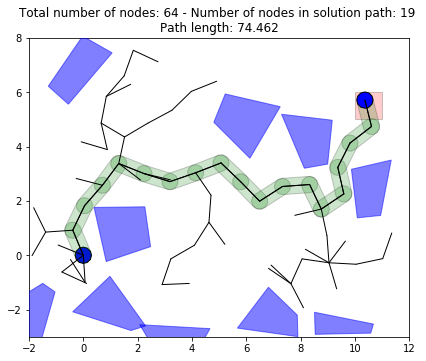

In [32]:
# Test your code in the simple environment
# don't modify this cell. It will be overwritten by the autograder.
# if you want to test things, please create additional cells at the end
environment = Environment('simple.yaml')
radius = 0.3
bounds = (-2, -3, 12, 8)
start = (0, 0)
goal_region = Polygon([(10,5), (10,6), (11,6), (11,5)])
path = rrt(bounds, environment, start, radius, goal_region)
# The check path function checks that the path is a list,
# its elements are tuples and the start and end are correct
# It doesn't check collisions.
check_path(path, bounds, environment, start, radius, goal_region)

(7.0, 5.5)


Path seems to be correct. 
 However, collisions are not checked. Make sure your path doesn't collide with any obstacles.

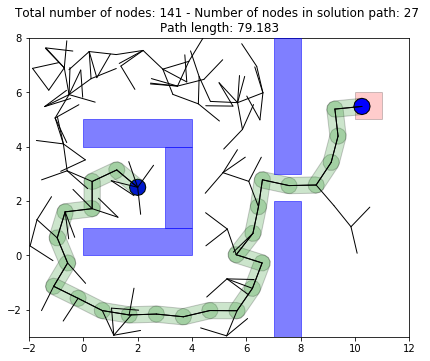

In [33]:
# Test your code in the bugrap environment
# don't modify this cell. It will be overwritten by the autograder.
# if you want to test things, please create additional cells at the end
environment = Environment('bugtrap.yaml')
radius = 0.3
bounds = (-2, -3, 12, 8)
start = (2, 2.5)
goal_region = Polygon([(10,5), (10,6), (11,6), (11,5)])
path = rrt(bounds, environment, start, radius, goal_region)
# The check path function checks that the path is a list,
# its elements are tuples and the start and end are correct
# It doesn't check collisions.
check_path(path, bounds, environment, start, radius, goal_region)

In [34]:
# Write the code to test your moderate and hard enviroments
# here and below

(12.222222222222221, 5.5)


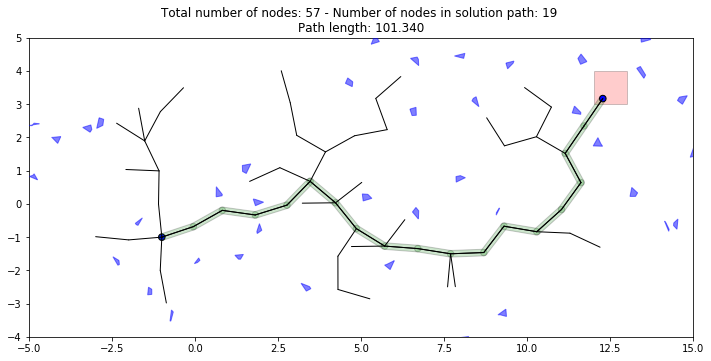

In [35]:
def random_environment(bounds, start, radius, goal, n, size_limits=(0.5, 1.5)):
    minx, miny, maxx, maxy = bounds
    # print(bounds)
    edges = 4
    minl, maxl = size_limits
    env = Environment(None)
    obs = []
    start_pose = Point(start).buffer(radius, resolution=3)
    obi = 0
    while obi < n:
        r = np.random.uniform(low=0.0, high=1.0, size=2)
        xy = np.array([minx + (maxx-minx)*r[0], miny + (maxy-miny)*r[1]])
        
        angles = np.random.rand(edges)
        angles = angles*2*np.pi / np.sum(angles)
        for i in range(1,len(angles)):
            angles[i] = angles[i-1] + angles[i]
        angles = 2*np.pi * angles / angles[-1] 
        angles = angles + 2*np.pi*np.random.rand()
        lengths = 0.5*minl + (maxl-minl) * 0.5 * np.random.rand(edges)
        xx = xy[0] + np.array([l*np.cos(a) for a,l in zip(angles,lengths)])
        yy = xy[1] + np.array([l*np.sin(a) for a,l in zip(angles,lengths)])
        p = Polygon([(x,y) for x,y in zip(xx,yy)])
        if p.intersects(start_pose) or p.intersects(goal):
            continue
        else:
            obi = obi + 1
            obs.append(p)
#         coords = xy + [l*np.cos(a),l*np.sin(a) for a,l in zip(angles,lengths)]
    env.add_obstacles(obs)
    return env


start = (-1 , -1)
radius = 0.1
goal_region = Polygon([(12,3), (12,4), (13,4),(13,3)])
bounds = (-5, -4, 15, 5)
envMed = random_environment(bounds, start, radius, goal_region, 40, (0.2, 0.4))
envHard = random_environment(bounds, start, radius, goal_region, 400, (0.2, 0.4))

# TEST MY SOLVER:
path = rrt(bounds, envMed, start, radius, goal_region)
        

(12.222222222222221, 5.5)


Path seems to be correct. 
 However, collisions are not checked. Make sure your path doesn't collide with any obstacles.

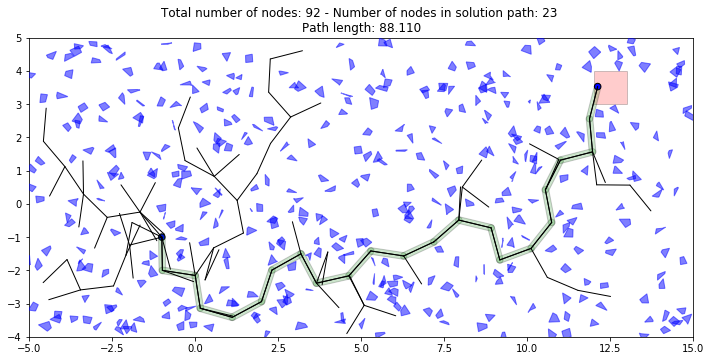

In [36]:
# Test your code in the challenging environment that you made
path = rrt(bounds, envHard, start, radius, goal_region)
check_path(path, bounds, envHard, start, radius, goal_region)